In [2]:
import torch
from torchvision import models, transforms
from PIL import Image
import json
import requests
import os
import matplotlib.pyplot as plt

## Load the pretrained EfficientNet model

In [5]:
model = models.efficientnet_b7(pretrained=True)
model.eval()

C:\Users\HP\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B7_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B7_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormAct

## Define the image transformations

In [7]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225]),
])

## Load the labels for the ImageNet dataset & Fetch the JSON data from the URL

In [13]:
response = requests.get('https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json')
labels_map = json.loads(response.text)

## Function to process a single image and return the predicted label and the image itself

In [16]:
def predict_image(image_path):
    try:
        input_image = Image.open(image_path).convert('RGB')  # Convert image to RGB
        input_tensor = preprocess(input_image)
        input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch as expected by the model

        # Move the input to the GPU if available
        if torch.cuda.is_available():
            input_batch = input_batch.to('cuda')
            model.to('cuda')

        # Perform the forward pass
        with torch.no_grad():
            output = model(input_batch)

        # Get the predicted class
        _, predicted_idx = torch.max(output, 1)
        predicted_label = labels_map[predicted_idx.item()]

        return predicted_label, input_image
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None

## Directory containing images

In [24]:
image_directory = 'D:\Image_Bank'

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\HP\AppData\Local\Temp\ipykernel_23276\2000819461.py:1: SyntaxWarning: invalid escape sequence '\I'
  image_directory = 'D:\Image_Bank'


## Loop through all images in the directory, predict their labels, and display them

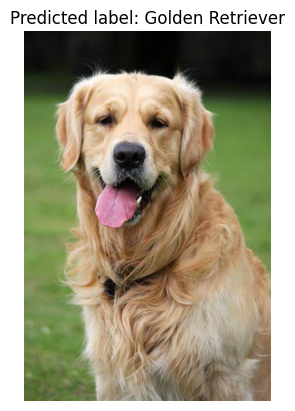

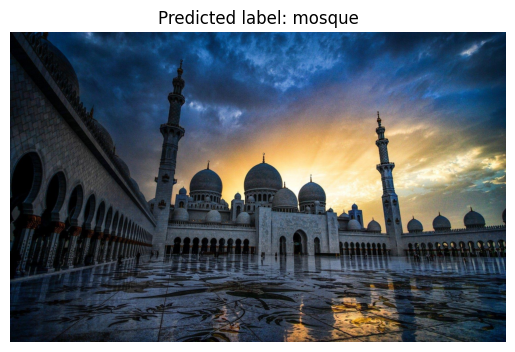

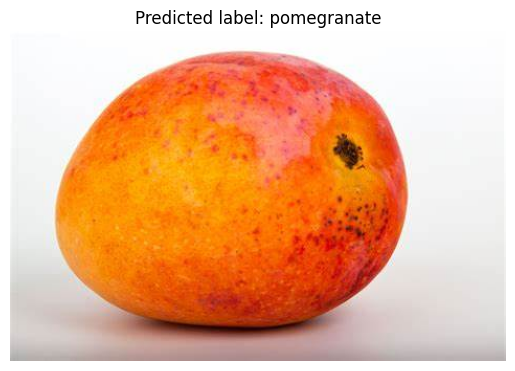

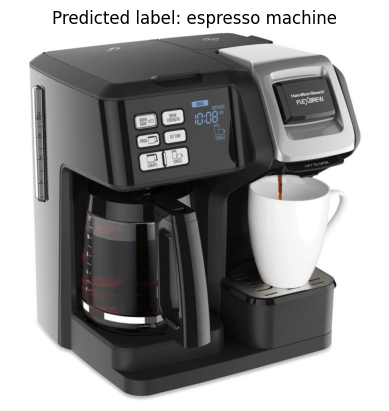

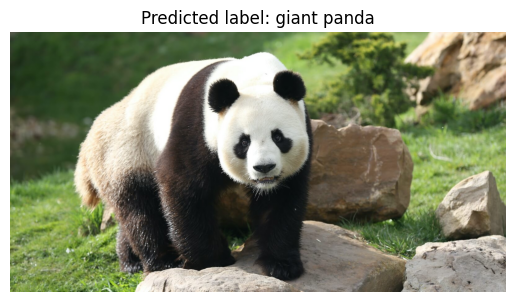

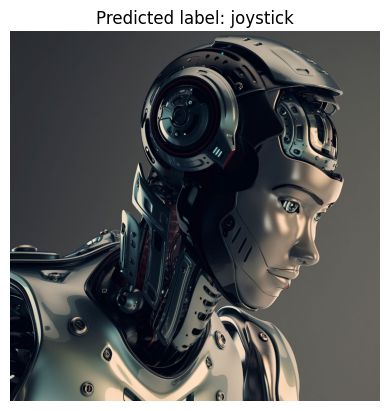

In [27]:
for image_name in os.listdir(image_directory):
    image_path = os.path.join(image_directory, image_name)
    if os.path.isfile(image_path):
        predicted_label, image = predict_image(image_path)
        if predicted_label is not None and image is not None:
            plt.figure()
            plt.imshow(image)
            plt.title(f"Predicted label: {predicted_label}")
            plt.axis('off')  # Hide axes
            plt.show()